In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_excel('wb_teapot.xlsx', sheets='Sheet1')  
df.sample(5) #эта команда выведет пять случайных строк таблицы, таблица не отобразиться полностью.

,id,Review,Star,Value,brandId,brandName,goodsName,isSoldOut,link,lowQuantity,...,Длина кабеля,Количество температурных режимов,Материал корпуса,Модель,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет,sale_june
67,4267106,7,4,1592,3217,Vitesse,"Чайник электрический 1,7л",0,https://www.wildberries.ru/catalog/4267106/det...,0,...,100.0,1,стекло,VS-168,2200.0,1.7,Франция,Китай,красный,0
496,10307537,51,4,3690,34103,TESLER,Чайник электрический,0,https://www.wildberries.ru/catalog/10307537/de...,0,...,80.0,1,нержавеющая сталь,KT-1755,2000.0,1.7,Россия,Китай,оранжевый,10
25,3390007,4,4,2555,17106,Vitek,Чайник VT-7006W,0,https://www.wildberries.ru/catalog/3390007/det...,0,...,75.0,1,пластик,VT-7006,2150.0,1.7,Россия,Китай,"белый, малиновый",0
230,6873624,2,3,3190,16102,Kitfort,Чайник КТ-638,0,https://www.wildberries.ru/catalog/6873624/det...,1,...,74.0,4,NaN,КТ-638,2200.0,1.5,Россия,Китай,серебристый,0
396,8900888,3,3,1190,29396,IRIT,Чайник стеклянный электрический (серый) 1236-01,0,https://www.wildberries.ru/catalog/8900888/det...,1,...,62.0,1,NaN,1236-01,1500.0,1.8,Россия,Китай,"серый, серебристый",0


In [7]:
df.info() #общая информация о столбцах, типах и пропущенных значениях


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                642 non-null    int64  
 1   Review                            642 non-null    int64  
 2   Star                              642 non-null    int64  
 3   Value                             642 non-null    int64  
 4   brandId                           642 non-null    int64  
 5   brandName                         642 non-null    object 
 6   goodsName                         642 non-null    object 
 7   isSoldOut                         642 non-null    int64  
 8   link                              642 non-null    object 
 9   lowQuantity                       642 non-null    int64  
 10  ordersCount                       642 non-null    int64  
 11  price                             642 non-null    int64  
 12  qualityR

In [8]:
df.describe() #общие статистики


,id,Review,Star,Value,brandId,isSoldOut,lowQuantity,ordersCount,price,qualityRate,Вес с упаковкой (кг),Длина кабеля,Мощность устройства,Объем чайника,sale_june
count,6.420000e+02,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,637.000000,625.000000,634.000000,641.000000,642.000000
mean,7.835927e+06,32.908100,3.819315,2210.987539,25560.778816,0.004673,0.073209,280.514019,2783.130841,97.364486,1.363077,72.977920,1994.779180,1.668019,14.725857
std,2.499043e+06,64.158267,0.960240,1451.388317,13756.815222,0.068252,0.260682,712.203553,1831.338995,8.153051,0.665768,77.105167,391.228811,0.339104,40.779031
min,2.171393e+06,0.000000,0.000000,0.000000,599.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.180000,0.600000,500.000000,0.500000,0.000000
25%,5.824747e+06,5.000000,3.000000,1205.250000,16102.000000,0.000000,0.000000,40.000000,1547.750000,97.000000,1.050000,63.000000,1800.000000,1.700000,0.000000
50%,8.123429e+06,11.000000,4.000000,1802.000000,20577.000000,0.000000,0.000000,90.000000,2254.500000,100.000000,1.300000,70.000000,2200.000000,1.700000,0.000000
75%,1.002333e+07,31.000000,4.000000,2788.750000,34103.000000,0.000000,0.000000,200.000000,3490.000000,100.000000,1.500000,75.000000,2200.000000,1.800000,10.000000
max,1.239497e+07,535.000000,5.000000,11790.000000,72224.000000,1.000000,1.000000,10300.000000,11790.000000,100.000000,11.400000,1000.000000,3000.000000,5.000000,400.000000


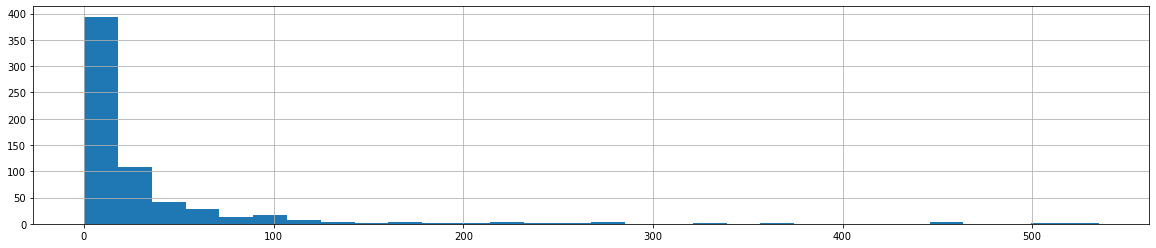

In [9]:
df['Review'].hist(bins=30, figsize=(20,4)); # как распределено количество отзывов


In [10]:
df[df['Review']>10]['sale_june'].count()


329

Попробуем предсказать будет ли у модели больше 10 отзывов или нет. В этмо случае у нас получается сбалансированный набор данных. Ниже выведем список столбцов и отберем те, которые будем использовать для классификатора.



In [11]:
df.columns # список столбцов нашего датасета 


Index(['id', 'Review', 'Star', 'Value', 'brandId', 'brandName', 'goodsName',
       'isSoldOut', 'link', 'lowQuantity', 'ordersCount', 'price',
       'qualityRate', 'Вес с упаковкой (кг)', 'Длина кабеля',
       'Количество температурных режимов', 'Материал корпуса', 'Модель',
       'Мощность устройства', 'Объем чайника', 'Страна бренда',
       'Страна производитель', 'Цвет', 'sale_june'],
      dtype='object')

In [12]:
col=['Star', 'Value', 'brandId', 'ordersCount', 
       'qualityRate', 'Вес с упаковкой (кг)', 'Длина кабеля',
       'Количество температурных режимов', 'Материал корпуса',
       'Мощность устройства', 'Объем чайника', 'Страна бренда',
       'Страна производитель', 'Цвет']  

# код ниже преобразует категорийные данные в переменные и заполняет пропуски наиболее вероятным значением
X=pd.DataFrame()
for i in col:
    if df[i].dtype.name != 'object':
        X[i]=df[i].copy()
        X.loc[X[i].isna(), i]=X[i].median()
    else:
        X[i]=pd.factorize(df[i])[0]

In [13]:
# результат, подготовленные данные
X.sample(3)

,Star,Value,brandId,ordersCount,qualityRate,Вес с упаковкой (кг),Длина кабеля,Количество температурных режимов,Материал корпуса,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет
39,3.0,825.0,16111.0,100.0,100.0,0.88,60.0,0,-1,1700.0,1.8,5,0,5
337,5.0,4090.0,16102.0,90.0,100.0,1.60,70.0,11,-1,2000.0,1.5,1,0,24
582,3.0,1794.0,14619.0,20.0,100.0,1.04,75.0,0,-1,2200.0,1.5,4,0,36


In [14]:
# Y будет равен нулю если отзывов 10 и меньше, и единице если больше 10
Y=df['Review'].apply(lambda x: 1 if x>10 else 0).values

In [15]:
#разделим набор на тренировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
# создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.3628, 'ordersCount'],
 [0.0835, 'brandId'],
 [0.0749, 'Star'],
 [0.0665, 'Страна бренда'],
 [0.0654, 'Цвет'],
 [0.0644, 'Value'],
 [0.063, 'Вес с упаковкой (кг)'],
 [0.0512, 'qualityRate'],
 [0.0486, 'Длина кабеля'],
 [0.0347, 'Материал корпуса'],
 [0.0319, 'Мощность устройства'],
 [0.0287, 'Объем чайника'],
 [0.0226, 'Количество температурных режимов'],
 [0.0017, 'Страна производитель']]

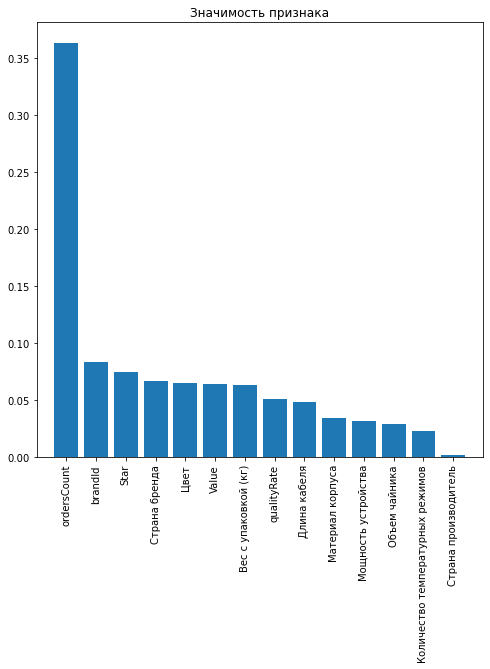

In [18]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [19]:
# как выглядит результат предсказания для тестовой выборки
model.predict(X_test)

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [20]:
# как выглядядт результаты тестового набора
y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [21]:
# метрика r2
r2_score(model.predict(X_test), y_test)

0.4342105263157895

In [22]:
from sklearn import metrics
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.8604651162790697


In [23]:
# матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[50, 11],
       [ 7, 61]], dtype=int64)

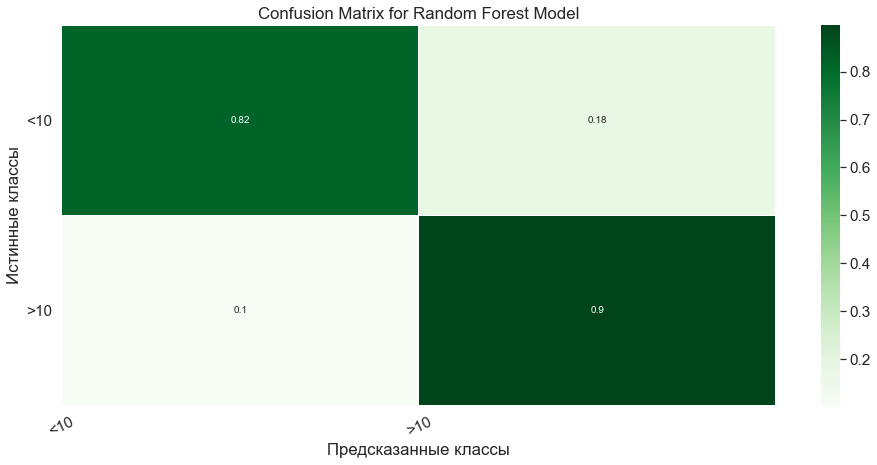

In [24]:
# так же матрица в процентах и более изящном виде
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['<10', '>10']                  
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [25]:
# Еще базовые метрики оценки точности модели
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        61
           1       0.85      0.90      0.87        68

    accuracy                           0.86       129
   macro avg       0.86      0.86      0.86       129
weighted avg       0.86      0.86      0.86       129



In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [28]:
gb_predictions = gb.predict_proba(X_test)[:, 1]

In [29]:
gb_predictions_2 = np.where(gb_predictions > 0.2, 1, 0)
gb_predictions_5 = np.where(gb_predictions > 0.5, 1, 0)
gb_predictions_8 = np.where(gb_predictions > 0.8, 1, 0)

In [30]:
confusion_matrix_gb_2 = confusion_matrix(y_test, gb_predictions_2)
confusion_matrix_gb_5 = confusion_matrix(y_test, gb_predictions_5)
confusion_matrix_gb_8 = confusion_matrix(y_test, gb_predictions_8)

Text(0.5, 1.0, 'Матрицы ошибок для 0.8')

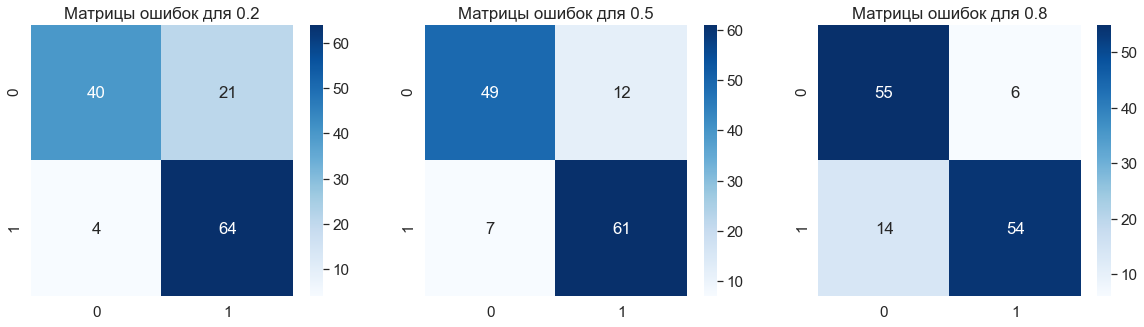

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(confusion_matrix_gb_2, annot=True, fmt='.0f', cmap='Blues', ax=ax[0])
ax[0].set_title('Матрицы ошибок для 0.2')
sns.heatmap(confusion_matrix_gb_5, annot=True, fmt='.0f', cmap='Blues', ax=ax[1])
ax[1].set_title('Матрицы ошибок для 0.5')
sns.heatmap(confusion_matrix_gb_8, annot=True, fmt='.0f', cmap='Blues', ax=ax[2])
ax[2].set_title('Матрицы ошибок для 0.8')